In [1]:
from google.colab import files
import pandas as pd
import io
import nltk
import pickle
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize,RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics #accuracy calculation
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#functions for loading data

def mount_drive():
  drive.mount("/content/drive")

def load_subreddit_data(filename="reddit_train.csv"):
  uploaded = files.upload()
  return pd.read_csv(io.BytesIO(uploaded[filename]), encoding='latin1')

In [ ]:
#load data
X = load_subreddit_data()

KeyError: ignored

In [ ]:
X = pd.read_csv("/content/drive/My Drive/Colab Notebooks/reddit_train.csv", encoding = 'latin1')

In [ ]:
#Kok Preprocessing
import re
corpus = []
for i in range(len(X)):
  comment = re.sub('[^a-zA-Z]',' ', X['BODY'][i])
  comment = comment.lower().split()
  ps = PorterStemmer()
  comment = [ps.stem(word) for word in comment if not word in set(stopwords.words('english'))]
  commment = ' '.join(comment)
  corpus.append(comment)

In [ ]:
corpuses = []
for i in range(len(corpus)):
  words = ""
  for j in range(len(corpus[i])):
     words = words + corpus[i][j] + " "
  corpuses.append(words)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
y = X["REMOVED"]
cv = CountVectorizer()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpuses)
# X = cv.fit_transform(X['BODY'])

# split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Scaling and Normalizing Decreases the Precision A bit as there might not be enough data

In [ ]:
#@title
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=False)
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=62)
clf = knn.fit(X_train, y_train)
clf.score(X_train, y_train)
clf.score(X_test, y_test)

0.7122324636775503

confusion matrix: 
[[4139  277]
 [1565  420]]
accuracy: 
0.7122324636775503
recall: 
0.9372735507246377
precision: 
0.7256311360448808

Accuracy: 0.7122324636775503
Confusion Matrix: [[4139  277]
 [1565  420]]
AUC Score: 0.5744302262439309


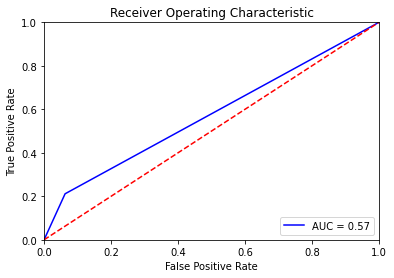

In [ ]:
#visualize results
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)
accuracy = (cm2[0][0] + cm2[1][1]) / (cm2[0][0] + cm2[1][1] + cm2[1][0] + cm2[0][1])
recall = (cm2[0][0]) /(cm2[0][0] + cm2[0][1])
precision = (cm2[0][0]) /(cm2[0][0] + cm2[1][0])
print("confusion matrix: ")
print(cm2)
print("accuracy: ")
print(accuracy)
print("recall: ")
print(recall)
print("precision: ")
print(precision)

accuracy=clf.score(X_test, y_test)
print("\nAccuracy: " + str(accuracy))
conf_matr=metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix: " + str(conf_matr))
auc=metrics.roc_auc_score(y_test, y_pred)
print("AUC Score: " + str(auc))
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

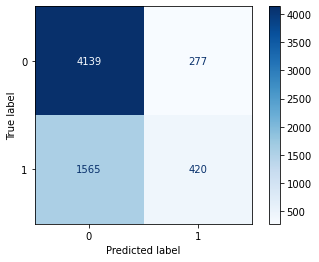

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, values_format = '.5g')
plt.show()

Grid Seach

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
grid_params = {
    'n_neighbors': [2,5,17,21,25,59,61,62],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
        }

gs = GridSearchCV(
    KNeighborsClassifier(),
    scoring=scorers,
    refit = "accuracy_score",
    param_grid=grid_params,
    verbose = 1,
    cv = 3,
    n_jobs = -1
)

gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 10.3min finished


In [ ]:
gs_results.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=62, p=2,
                     weights='distance')

In [ ]:
vectorizer.get_feature_names()

['comment', 'useless']

In [ ]:
resultsDF = pd.concat([pd.DataFrame(gs_results.cv_results_["params"]),pd.DataFrame(gs_results.cv_results_["mean_test_accuracy_score"], columns=["Accuracy"])],axis=1)
resultsDF.groupby(by = ["weights"])
resultsDF

,metric,n_neighbors,weights,Accuracy
0,euclidean,2,uniform,0.628659
1,euclidean,2,distance,0.436029
2,euclidean,5,uniform,0.624642
3,euclidean,5,distance,0.624508
4,euclidean,17,uniform,0.680884
5,euclidean,17,distance,0.680416
6,euclidean,21,uniform,0.687780
7,euclidean,21,distance,0.687245
8,euclidean,25,uniform,0.690325
9,euclidean,25,distance,0.689990


<Figure size 432x288 with 0 Axes>

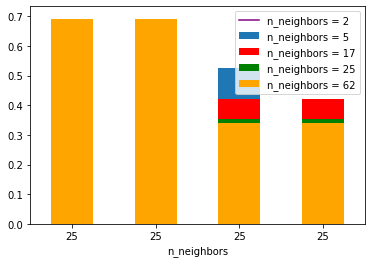

<Figure size 432x288 with 0 Axes>

In [161]:
ax = plt.gca()
resultsDF1 = resultsDF[(resultsDF.n_neighbors == 2)]
resultsDF1.plot(kind='bar', x = 'n_neighbors', y = 'Accuracy', ax = ax, label = "n_neighbors = 2", stacked = True)
resultsDF2 = resultsDF[(resultsDF.n_neighbors == 5)]
resultsDF2.plot(kind='bar', x = 'n_neighbors', y = 'Accuracy', color = "red", ax = ax, label = "n_neighbors = 5", stacked = True)
resultsDF2 = resultsDF[(resultsDF.n_neighbors == 17)]
resultsDF2.plot(kind='bar', x = 'n_neighbors', y = 'Accuracy', color = "green", ax = ax, label = "n_neighbors = 17", stacked = True)
resultsDF3 = resultsDF[(resultsDF.n_neighbors == 25)]
resultsDF3.plot(kind='bar', x = 'n_neighbors', y = 'Accuracy', color = "orange", ax = ax, label = "n_neighbors = 25", stacked = True)
resultsDF4 = resultsDF[(resultsDF.n_neighbors == 62)]
resultsDF4.plot(kind='line', x = 'n_neighbors', y = 'Accuracy', color = "purple", ax = ax, label = "n_neighbors = 62", stacked = True)
plt.figure()

Maximum accuracy:- 0.7172316825496017 at K = 12


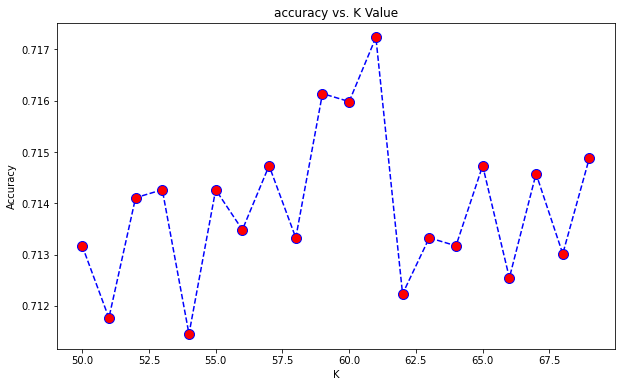

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(50,70):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(50,70),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+1)

Minimum error:- 0.3101077956569286 at K = 24


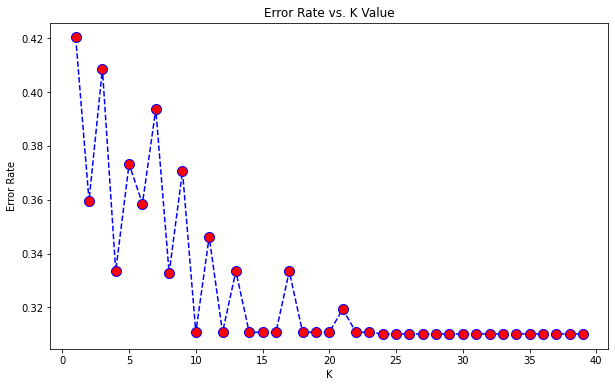

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
metrics.classification_report(y_test, y_pred)
classificationReport = classification_report(y_test, y_pred)
print(classificationReport)

              precision    recall  f1-score   support

           0       0.73      0.94      0.82      4416
           1       0.60      0.21      0.31      1985

    accuracy                           0.71      6401
   macro avg       0.66      0.57      0.57      6401
weighted avg       0.69      0.71      0.66      6401



Using Grid Search Hyper Parameters

In [ ]:
knn = KNeighborsClassifier(n_neighbors=62)
clf2 = knn.fit(X_train, y_train)
clf2.score(X_train, y_train)
clf2.score(X_test, y_test)

0.7122324636775503


Accuracy: 0.7122324636775503
Confusion Matrix: [[4139  277]
 [1565  420]]
AUC Score: 0.5744302262439309


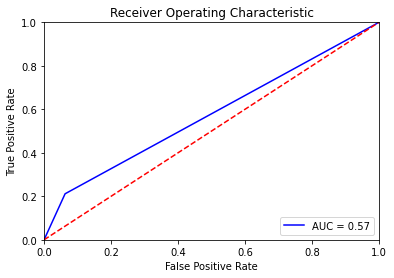

In [ ]:
#visualize results
y_pred = clf2.predict(X_test)
from sklearn.metrics import confusion_matrix
# cm2 = confusion_matrix(y_test, y_pred)
# accuracy = (cm2[0][0] + cm2[1][1]) / (cm2[0][0] + cm2[1][1] + cm2[1][0] + cm2[0][1])
# recall = (cm2[0][0]) /(cm2[0][0] + cm2[0][1])
# precision = (cm2[0][0]) /(cm2[0][0] + cm2[1][0])
# print("confusion matrix: ")
# print(cm2)
# print("accuracy: ")
# print(accuracy)
# print("recall: ")
# print(recall)
# print("precision: ")
# print(precision)

accuracy=clf2.score(X_test, y_test)
print("\nAccuracy: " + str(accuracy))
conf_matr=metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix: " + str(conf_matr))
auc=metrics.roc_auc_score(y_test, y_pred)
print("AUC Score: " + str(auc))
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import re
from sklearn.metrics.pairwise import cosine_similarity

input = "useless comments"
pred = []
comment = re.sub('[^a-zA-Z]',' ', input)
comment = comment.lower().split()
ps = PorterStemmer()
comment = [ps.stem(word) for word in comment if not word in set(stopwords.words('english'))]
commment = ' '.join(comment)
pred.append(comment)

testpred = []
for i in range(len(pred)):
  words = ""
  for j in range(len(pred[i])):
     words = words + pred[i][j] + " "
  testpred.append(words)

t = vectorizer.transform(testpred)
cosine_similarity(X,t)

ValueError: ignored